In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## SS Solutions Analysis

In [47]:
# df = pd.read_csv("datasets/cn_k12_math_problems_ss_command-r-03-2024_25_5.csv")  # Weak
# df = pd.read_csv("datasets/cn_k12_math_problems_ss_command-r-plus-08-2024_25_5.csv")  # Strong
# df = pd.read_csv("datasets/cn_k12_math_problems_ss_command-r-plus-08-2024_300_5.csv") # Strong and Long (WAIT: For some reason there are only 250 unique row_ids, instead of 300?)
df = pd.read_csv("datasets/cn_k12_math_problems_ss_solveable_problems_command-r-03-2024_82_5.csv") # Weak; The "solvable" ones identified from strong and long above
print(len(df))
df.head(10)


410


,row_id,problem,ground_truth_solution,solution_idx,candidate_solution,verification_reasoning,verification,prefix_reasoning,prefix
0,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",0,Let's examine each statement:\n\nA: The graph ...,The final answer of the ground truth solution ...,False,The error occurs when the candidate solution s...,Let's examine each statement:\n\nA: The graph ...
1,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",1,Let's analyze the given problem:\n1. Let's sub...,The final answer of the ground truth solution ...,False,The error occurs when the candidate solution s...,Let's analyze the given problem:\n1. Let's sub...
2,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",2,Let's analyze the given problem:\n\n1. We're t...,"The correct answer, as detailed in the <soluti...",False,The error occurs when the candidate solution s...,Let's analyze the given problem:\n\n1. We're t...
3,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",3,Let's analyze the given problem:\n1. We're tol...,The final answer in the ground truth solution ...,True,The error occurs when the candidate solution d...,Let's analyze the given problem:\n1. We're tol...
4,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",4,Let's analyze the given problem:\n1. We're tol...,The final answer in the ground truth solution ...,False,The error occurs when the candidate solution s...,Let's analyze the given problem:\n1. We're tol...
5,2,"Among the following phenomena in life, the one...",To analyze which of the given phenomena belong...,0,The correct answer is: **C: The movement of th...,The ground truth solution identifies the corre...,False,The error occurs when the candidate solution s...,The correct answer is: **C: The movement of th...
6,2,"Among the following phenomena in life, the one...",To analyze which of the given phenomena belong...,1,The correct answer is: **C: The movement of th...,The ground truth solution identifies the corre...,False,The error occurs when the candidate solution s...,The correct answer is: **C: The movement of th...
7,2,"Among the following phenomena in life, the one...",To analyze which of the given phenomena belong...,2,The phenomenon that corresponds to a translati...,The ground truth solution identifies the corre...,False,The error occurs when the candidate solution s...,The phenomenon that corresponds to a translati...
8,2,"Among the following phenomena in life, the one...",To analyze which of the given phenomena belong...,3,The phenomenon that corresponds to a translati...,The ground truth solution identifies the corre...,False,The error occurs when the candidate solution s...,The phenomenon that corresponds to a translati...
9,2,"Among the following phenomena in life, the one...",To analyze which of the given phenomena belong...,4,The correct answer is: **C: The movement of th...,The ground truth solution identifies the corre...,False,The error occurs when the candidate solution s...,The correct answer is: **C: The movement of th...


In [48]:
len(df["row_id"].unique())

82

#### Percentage of Correct Solutions (Across All Solutions, 10 Solutions sampled per Problem)

In [49]:
# Calculate the percentage of solutions with verification value of True
percentage_true = (df['verification'] == True).mean() * 100

print(f"Total number of problems: {len(df['row_id'].unique())}")
print(f"Total number of solutions: {len(df)}")
print(f"Total number of correct solutions: {len(df[df['verification'] == True])}")
print(f"Percentage of overall solutions with verification value of True: {percentage_true:.2f}%")
# Calculate the percentage of problems with at least one correct solution
problems_with_correct_solution = df.groupby('row_id')['verification'].any()
percentage_problems_with_correct = (problems_with_correct_solution.mean() * 100)

print(f"Percentage of problems with at least one correct solution: {percentage_problems_with_correct:.2f}%")
print(f"Number of problems with at least one correct solution: {problems_with_correct_solution.sum()}")


Total number of problems: 82
Total number of solutions: 410
Total number of correct solutions: 105
Percentage of overall solutions with verification value of True: 25.61%
Percentage of problems with at least one correct solution: 54.88%
Number of problems with at least one correct solution: 45


#### How hard is each problem? Plotting the proportion of correct solutions per problem

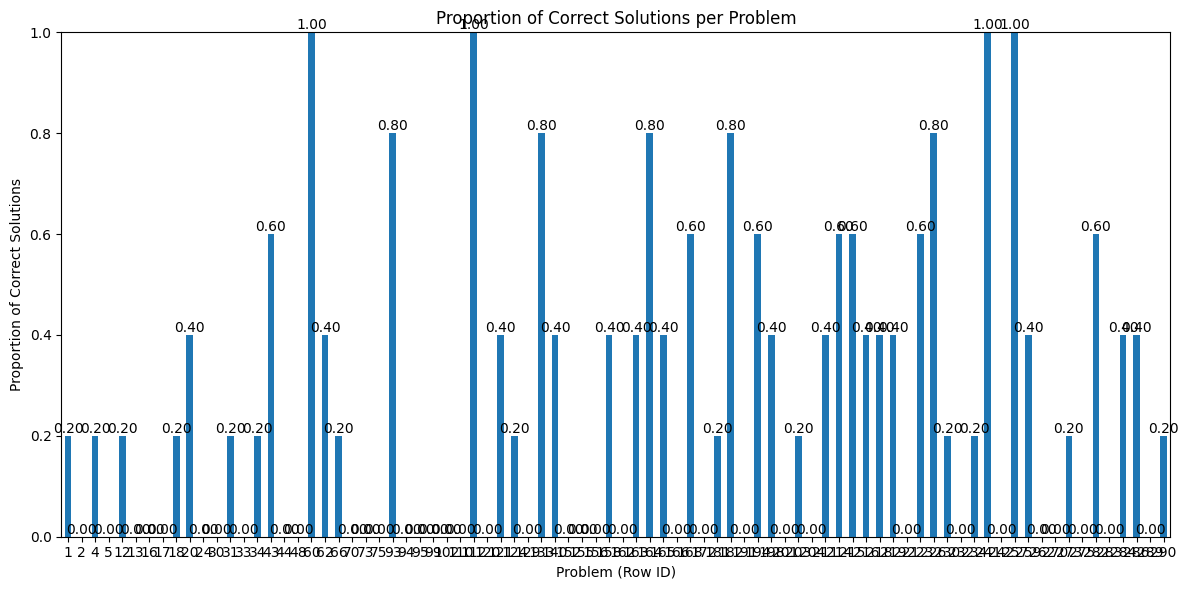

Average proportion of correct solutions across all problems: 0.26
Minimum proportion of correct solutions: 0.00
Maximum proportion of correct solutions: 1.00


In [50]:
# Group by row_id and calculate the proportion of correct solutions for each problem
correct_proportions = df.groupby('row_id')['verification'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
correct_proportions.plot(kind='bar')

plt.title('Proportion of Correct Solutions per Problem')
plt.xlabel('Problem (Row ID)')
plt.ylabel('Proportion of Correct Solutions')
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

# Add value labels on top of each bar
for i, v in enumerate(correct_proportions):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Average proportion of correct solutions across all problems: {correct_proportions.mean():.2f}")
print(f"Minimum proportion of correct solutions: {correct_proportions.min():.2f}")
print(f"Maximum proportion of correct solutions: {correct_proportions.max():.2f}")


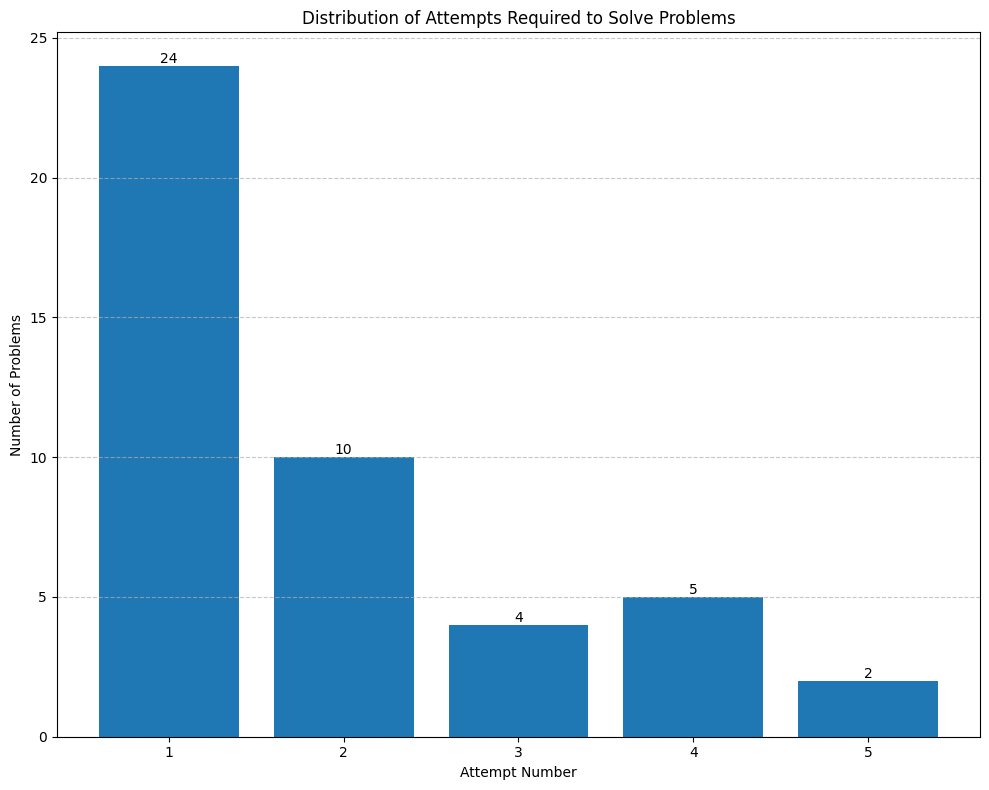

Number of problems solved on first attempt: 24
Number of problems that required all 5 attempts: 2
Average number of attempts required: 1.91


In [51]:
# Define max_attempts
max_attempts = 5

# Create a DataFrame to store the attempt number at which each problem was solved correctly
first_correct_attempt = df[df['verification'] == True].groupby('row_id')['solution_idx'].min()

# Convert to a list of attempt numbers (adding 1 because solution_idx is 0-indexed)
attempts_to_solve = (first_correct_attempt + 1).tolist()

# Create a histogram
plt.figure(figsize=(10, 8))
plt.hist(attempts_to_solve, bins=range(1, max_attempts + 2), align='left', rwidth=0.8)

plt.title('Distribution of Attempts Required to Solve Problems')
plt.xlabel('Attempt Number')
plt.ylabel('Number of Problems')
plt.xticks(range(1, max_attempts + 1))

# Add value labels on top of each bar
for i in range(1, max_attempts + 1):
    count = sum(1 for x in attempts_to_solve if x == i)
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Number of problems solved on first attempt: {sum(1 for x in attempts_to_solve if x == 1)}")
print(f"Number of problems that required all {max_attempts} attempts: {sum(1 for x in attempts_to_solve if x == max_attempts)}")
print(f"Average number of attempts required: {sum(attempts_to_solve) / len(attempts_to_solve):.2f}")



#### How many solutions did it take to get the correct answer?


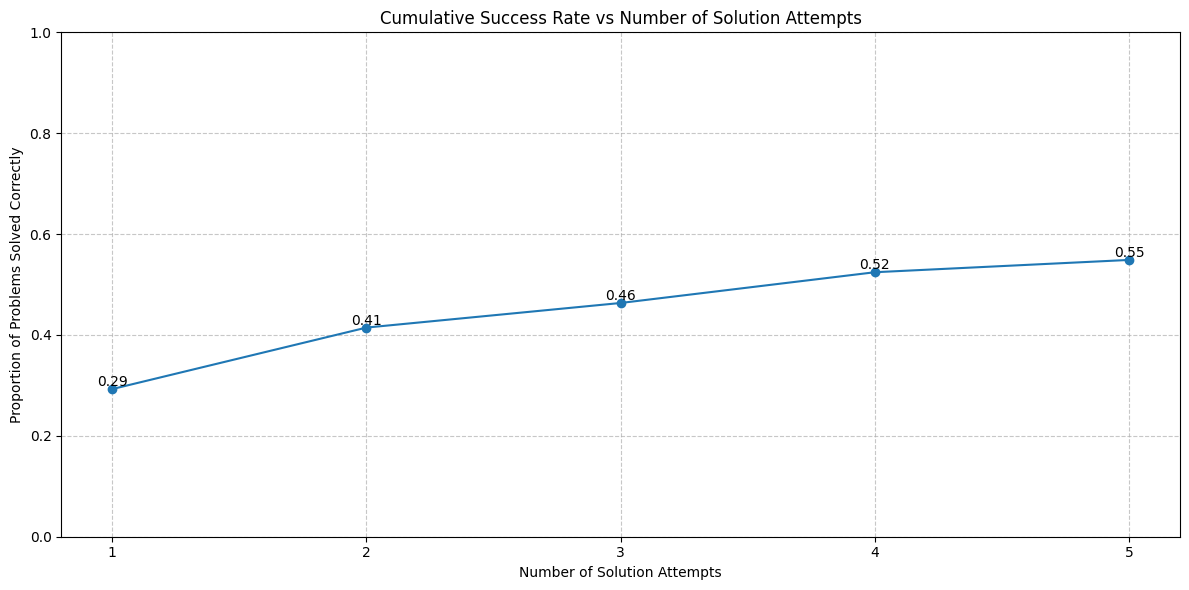

Success rate with 1 attempt: 0.29
Success rate with 5 attempts: 0.55
Number of attempts to reach 90% success rate: Not reached


In [52]:
# Determine the number of solution canddiates for every problem.
max_attempts = df['solution_idx'].max() + 1  # Add 1 because solution_idx starts at 0


success_rates = []
# Consider each number of solution attempts: What was the success rate?
for n_attempts in range(1, max_attempts + 1):
    # For each problem, check if any solution up to n_attempts is correct
    success_by_problem = df[df['solution_idx'] < n_attempts].groupby('row_id')['verification'].any()
    # What was the average success rate, given n_attempts?
    success_rate = success_by_problem.mean()
    success_rates.append(success_rate)

# Create a line plot to display this information
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_attempts + 1), success_rates, marker='o')

plt.title('Cumulative Success Rate vs Number of Solution Attempts')
plt.xlabel('Number of Solution Attempts')
plt.ylabel('Proportion of Problems Solved Correctly')
plt.xticks(range(1, max_attempts + 1))
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

# Add value labels for each point
for i, v in enumerate(success_rates):
    plt.text(i + 1, v, f'{v:.2f}', ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Success rate with 1 attempt: {success_rates[0]:.2f}")
print(f"Success rate with {max_attempts} attempts: {success_rates[-1]:.2f}")
print(f"Number of attempts to reach 90% success rate: {next((i for i, rate in enumerate(success_rates) if rate >= 0.9), 'Not reached')}")


#### Selecting the "Solvable" problems

Percentage of correct completions for each problem:
<class 'pandas.core.series.Series'>
row_id
0      0.0
1      0.4
2      1.0
3      0.0
4      0.4
      ... 
290    1.0
291    0.2
292    0.0
293    0.0
294    0.0
Name: verification, Length: 250, dtype: float64

Problems with success rates >= 0.4:
row_id
1      0.4
2      1.0
4      0.4
5      0.6
12     0.4
      ... 
283    0.6
284    0.6
286    0.6
289    0.6
290    1.0
Name: verification, Length: 82, dtype: float64

Number of solvable problems: 82
Percentage of solvable problems: 32.80%

Row IDs of solvable problems:
[1, 2, 4, 5, 12, 13, 16, 17, 18, 20, 24, 30, 31, 33, 34, 43, 44, 48, 60, 62, 66, 70, 73, 75, 93, 94, 95, 99, 102, 110, 112, 120, 121, 124, 129, 133, 140, 152, 155, 156, 158, 162, 163, 164, 165, 166, 168, 172, 181, 182, 191, 194, 198, 201, 203, 204, 211, 214, 215, 216, 218, 219, 221, 223, 226, 230, 232, 234, 241, 242, 257, 259, 262, 270, 273, 275, 282, 283, 284, 286, 289, 290]
Solvable problem row IDs have been writte

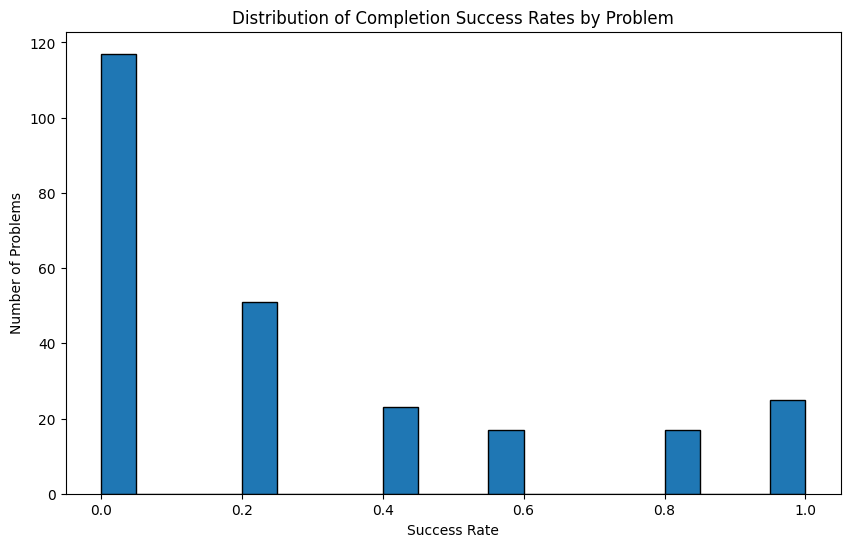

In [46]:
# Calculate the percentage of correct completions for each row_id
completion_success_rates = df.groupby('row_id')['verification'].mean()

# Display the results
print("Percentage of correct completions for each problem:")
print(type(completion_success_rates))
print(completion_success_rates)

# Get the row_ids having success rates >= 0.4
solvable_problems = completion_success_rates[completion_success_rates >= 0.4]

print("\nProblems with success rates >= 0.4:")
print(solvable_problems)

print(f"\nNumber of solvable problems: {len(solvable_problems)}")
print(f"Percentage of solvable problems: {len(solvable_problems) / len(completion_success_rates):.2%}")

# Get the row_ids of solvable problems
solvable_row_ids = solvable_problems.index.tolist()
print("\nRow IDs of solvable problems:")
print(solvable_row_ids)

# Write the solvable_row_ids to a text file
with open('datasets/solveable_problems_row_ids.txt', 'w') as f:
    for row_id in solvable_row_ids:
        f.write(f"{row_id}\n")
print(f"Solvable problem row IDs have been written to datasets/solveable_problems_row_ids.txt")

# Visualize the distribution of success rates
plt.figure(figsize=(10, 6))
plt.hist(completion_success_rates, bins=20, edgecolor='black')
plt.title('Distribution of Completion Success Rates by Problem')
plt.xlabel('Success Rate')
plt.ylabel('Number of Problems')
plt.show()


# (Part 2) Exploring Strong Completions

In [22]:
df = pd.read_csv("datasets/cn_k12_math_problems_completions_command-r-plus-08-2024_ALL_5_OFF.csv")  # 82 easy problems -> 410 prefixes -> 410 completions
print(len(df))
df.head()

410


,row_id,problem,ground_truth_solution,solution_idx,candidate_solution,verification_reasoning,verification_x,prefix_reasoning,prefix,completion,verification_y,completion_verification_reasoning,completion_prefix_reasoning,completion_verification_prefix
0,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",0,Let's examine each statement:\n\nA: The graph ...,The final answer of the ground truth solution ...,False,The error occurs when the candidate solution s...,Let's examine each statement:\n\nA: The graph ...,\nHope this helps!,False,The final answer of the ground truth solution ...,The error occurs when the candidate solution s...,Let's examine each statement:\n\nA: The graph ...
1,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",1,Let's analyze the given problem:\n1. Let's sub...,The final answer of the ground truth solution ...,False,The error occurs when the candidate solution s...,Let's analyze the given problem:\n1. Let's sub...,• Statement C is incorrect because y decreases...,False,The final answer of the ground truth solution ...,The error occurs when the candidate solution s...,Let's analyze the given problem:\n1. Let's sub...
2,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",2,Let's analyze the given problem:\n\n1. We're t...,"The correct answer, as detailed in the <soluti...",False,The error occurs when the candidate solution s...,Let's analyze the given problem:\n\n1. We're t...,"\n3. With this in mind, we can evaluate the op...",True,The final answer in the ground truth solution ...,The candidate solution does not contain any er...,Let's analyze the given problem:\n\n1. We're t...
3,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",3,Let's analyze the given problem:\n1. We're tol...,The final answer in the ground truth solution ...,True,The error occurs when the candidate solution d...,Let's analyze the given problem:\n1. We're tol...,** \boxed{D}**.,True,The final answer of the ground truth solution ...,The candidate solution does not contain any er...,Let's analyze the given problem:\n1. We're tol...
4,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",4,Let's analyze the given problem:\n1. We're tol...,The final answer in the ground truth solution ...,False,The error occurs when the candidate solution s...,Let's analyze the given problem:\n1. We're tol...,\nC: The value of $y$ increases as $x$ increas...,False,The final answer of the ground truth solution ...,The error occurs when the candidate solution s...,Let's analyze the given problem:\n1. We're tol...


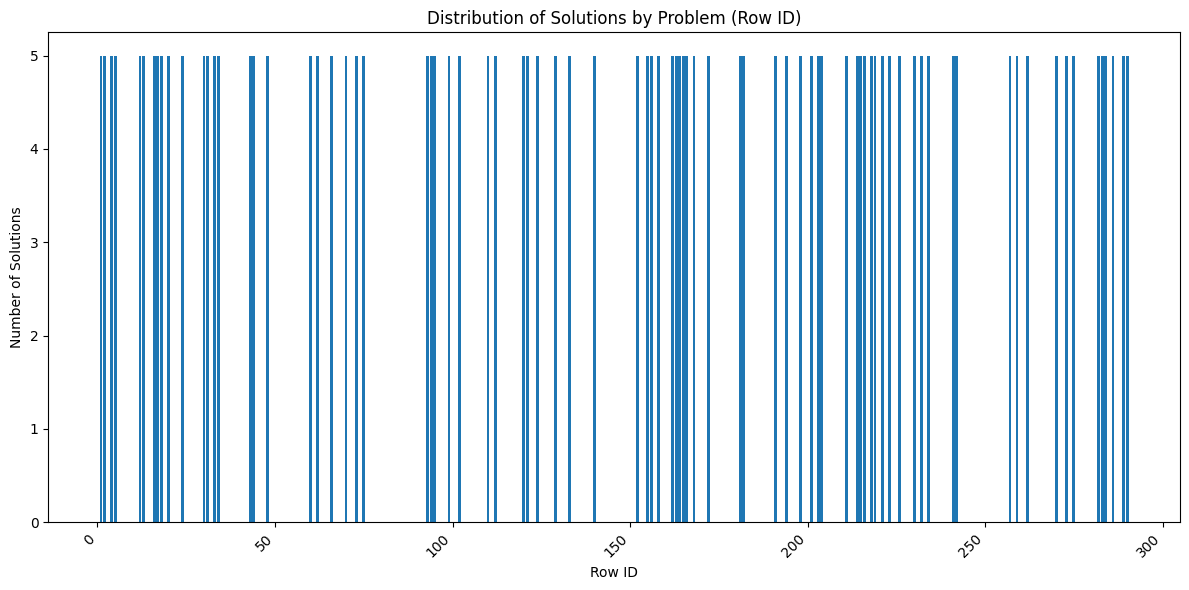

Total number of solutions: 410
Total number of unique row_ids: 82
Average number of solutions per row_id: 5.00
Minimum number of solutions for a row_id: 5
Maximum number of solutions for a row_id: 5


In [23]:
# Create a histogram of row_ids
plt.figure(figsize=(12, 6))
row_id_counts = df['row_id'].value_counts().sort_index()
plt.bar(row_id_counts.index, row_id_counts.values)
plt.title('Distribution of Solutions by Problem (Row ID)')
plt.xlabel('Row ID')
plt.ylabel('Number of Solutions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Total number of solutions: {len(df)}")
print(f"Total number of unique row_ids: {len(row_id_counts)}")
print(f"Average number of solutions per row_id: {row_id_counts.mean():.2f}")
print(f"Minimum number of solutions for a row_id: {row_id_counts.min()}")
print(f"Maximum number of solutions for a row_id: {row_id_counts.max()}")


### OOPS! These completions are of every weak prefix, but I only actually wanted completions for the incorrect prefixes! Let's identify the incorrect prefixes (row, solution_idx), and then filter our df to those.


In [39]:
# Let's just filter the df to those where the verification_prefix reresents an incorrect solution.
df = df[df['verification_x'] == False]
# Change verification_x to verification, and verification_y to completion_verification
df = df.rename(columns={
    'verification_x': 'verification',
    'verification_y': 'completion_verification'
})

df.to_csv("datasets/cn_k12_math_problems_completions_command-r-plus-08-2024_ALL_5_OFF_INCORRECT_PREFIXES.csv", index=False)
print(f"Number of completions after filtering for incorrect prefixes: {len(df)}")
df.head()


Number of completions after filtering for incorrect prefixes: 305


,row_id,problem,ground_truth_solution,solution_idx,candidate_solution,verification_reasoning,verification,prefix_reasoning,prefix,completion,completion_verification,completion_verification_reasoning,completion_prefix_reasoning,completion_verification_prefix
0,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",0,Let's examine each statement:\n\nA: The graph ...,The final answer of the ground truth solution ...,False,The error occurs when the candidate solution s...,Let's examine each statement:\n\nA: The graph ...,\nHope this helps!,False,The final answer of the ground truth solution ...,The error occurs when the candidate solution s...,Let's examine each statement:\n\nA: The graph ...
1,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",1,Let's analyze the given problem:\n1. Let's sub...,The final answer of the ground truth solution ...,False,The error occurs when the candidate solution s...,Let's analyze the given problem:\n1. Let's sub...,• Statement C is incorrect because y decreases...,False,The final answer of the ground truth solution ...,The error occurs when the candidate solution s...,Let's analyze the given problem:\n1. Let's sub...
2,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",2,Let's analyze the given problem:\n\n1. We're t...,"The correct answer, as detailed in the <soluti...",False,The error occurs when the candidate solution s...,Let's analyze the given problem:\n\n1. We're t...,"\n3. With this in mind, we can evaluate the op...",True,The final answer in the ground truth solution ...,The candidate solution does not contain any er...,Let's analyze the given problem:\n\n1. We're t...
4,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",4,Let's analyze the given problem:\n1. We're tol...,The final answer in the ground truth solution ...,False,The error occurs when the candidate solution s...,Let's analyze the given problem:\n1. We're tol...,\nC: The value of $y$ increases as $x$ increas...,False,The final answer of the ground truth solution ...,The error occurs when the candidate solution s...,Let's analyze the given problem:\n1. We're tol...
5,2,"Among the following phenomena in life, the one...",To analyze which of the given phenomena belong...,0,The correct answer is: **C: The movement of th...,The ground truth solution identifies the corre...,False,The error occurs when the candidate solution s...,The correct answer is: **C: The movement of th...,\n---\n\n**C: The movement of the minute hand ...,False,The ground truth solution identifies the corre...,The error occurs when the candidate solution s...,The correct answer is: **C: The movement of th...


In [25]:
# Calculate the percentage of solutions with verification value of True
percentage_true = (df['verification_y'] == True).mean() * 100

print(f"Total number of problems: {len(df['row_id'].unique())}")
print(f"Total number of solutions: {len(df)}")
print(f"Total number of correct solutions: {len(df[df['verification_y'] == True])}")
print(f"Percentage of overall solutions with verification value of True: {percentage_true:.2f}%")
# Calculate the percentage of problems with at least one correct solution
problems_with_correct_solution = df.groupby('row_id')['verification_y'].any()
percentage_problems_with_correct = (problems_with_correct_solution.mean() * 100)

print(f"Percentage of problems with at least one correct solution: {percentage_problems_with_correct:.2f}%")
print(f"Number of problems with at least one correct solution: {problems_with_correct_solution.sum()}")


Total number of problems: 78
Total number of solutions: 305
Total number of correct solutions: 61
Percentage of overall solutions with verification value of True: 20.00%
Percentage of problems with at least one correct solution: 52.56%
Number of problems with at least one correct solution: 41


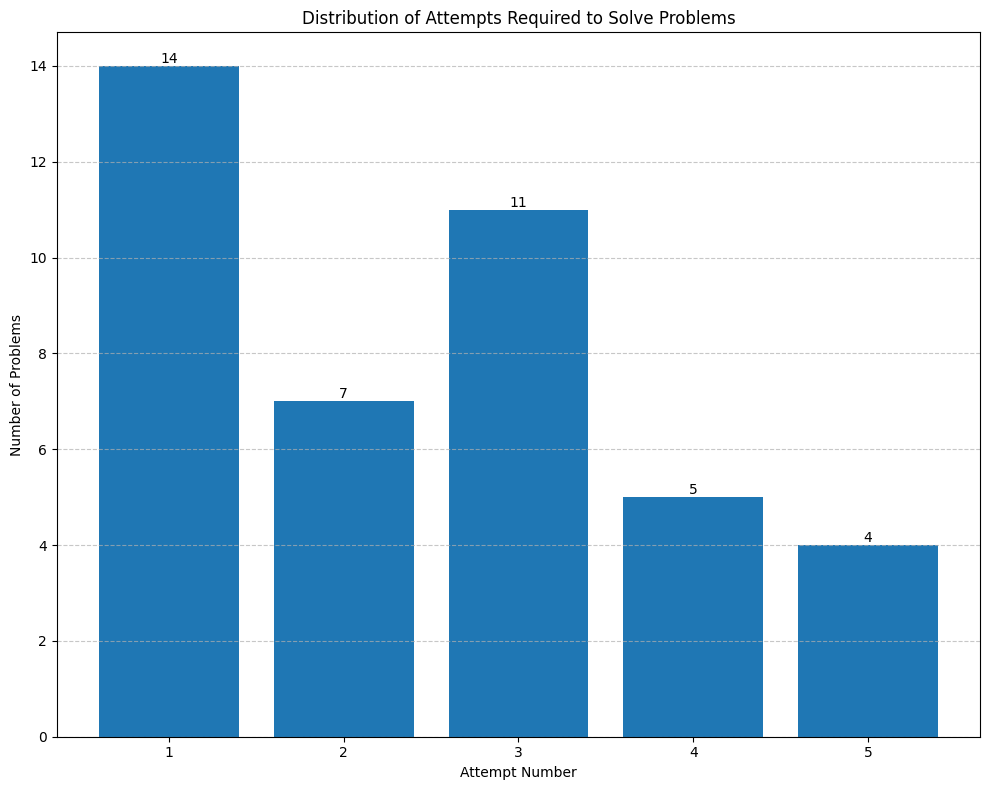

Number of problems solved on first attempt: 14
Number of problems that required all 5 attempts: 4
Average number of attempts required: 2.46


In [28]:
# Define max_attempts
max_attempts = 5

# Create a DataFrame to store the attempt number at which each problem was solved correctly
first_correct_attempt = df[df['verification_y'] == True].groupby('row_id')['solution_idx'].min()

# Convert to a list of attempt numbers (adding 1 because solution_idx is 0-indexed)
attempts_to_solve = (first_correct_attempt + 1).tolist()

# Create a histogram
plt.figure(figsize=(10, 8))
plt.hist(attempts_to_solve, bins=range(1, max_attempts + 2), align='left', rwidth=0.8)

plt.title('Distribution of Attempts Required to Solve Problems')
plt.xlabel('Attempt Number')
plt.ylabel('Number of Problems')
plt.xticks(range(1, max_attempts + 1))

# Add value labels on top of each bar
for i in range(1, max_attempts + 1):
    count = sum(1 for x in attempts_to_solve if x == i)
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Number of problems solved on first attempt: {sum(1 for x in attempts_to_solve if x == 1)}")
print(f"Number of problems that required all {max_attempts} attempts: {sum(1 for x in attempts_to_solve if x == max_attempts)}")
print(f"Average number of attempts required: {sum(attempts_to_solve) / len(attempts_to_solve):.2f}")



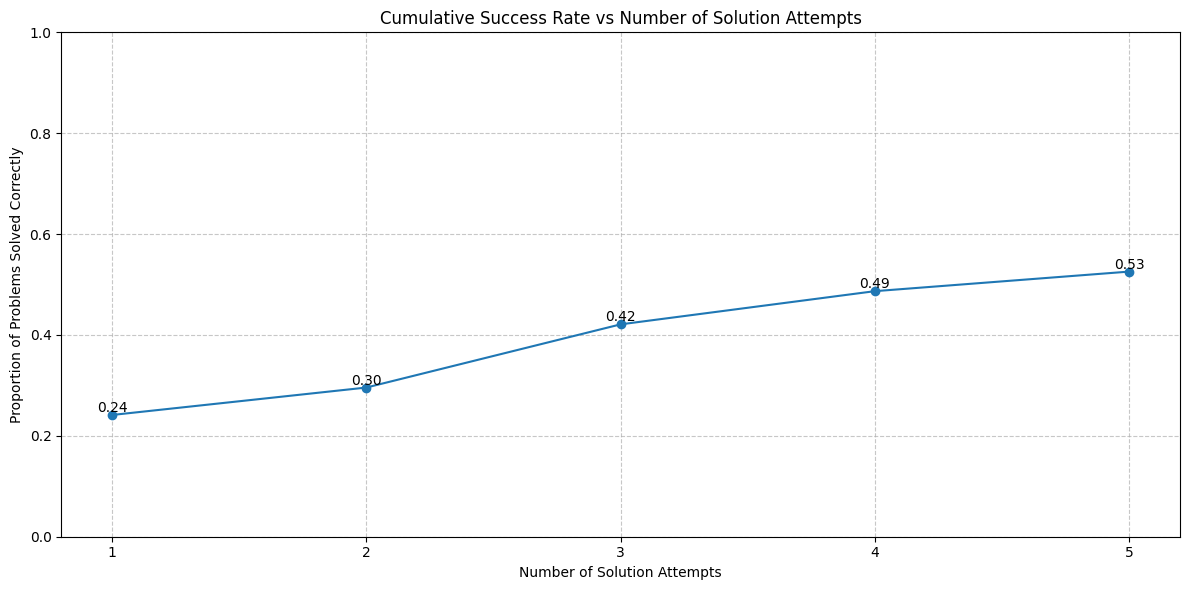

Success rate with 1 attempt: 0.24
Success rate with 5 attempts: 0.53
Number of attempts to reach 90% success rate: Not reached


In [29]:
# Determine the number of solution canddiates for every problem.
max_attempts = df['solution_idx'].max() + 1  # Add 1 because solution_idx starts at 0


success_rates = []
# Consider each number of solution attempts: What was the success rate?
for n_attempts in range(1, max_attempts + 1):
    # For each problem, check if any solution up to n_attempts is correct
    success_by_problem = df[df['solution_idx'] < n_attempts].groupby('row_id')['verification_y'].any()
    # What was the average success rate, given n_attempts?
    success_rate = success_by_problem.mean()
    success_rates.append(success_rate)

# Create a line plot to display this information
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_attempts + 1), success_rates, marker='o')

plt.title('Cumulative Success Rate vs Number of Solution Attempts')
plt.xlabel('Number of Solution Attempts')
plt.ylabel('Proportion of Problems Solved Correctly')
plt.xticks(range(1, max_attempts + 1))
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

# Add value labels for each point
for i, v in enumerate(success_rates):
    plt.text(i + 1, v, f'{v:.2f}', ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Success rate with 1 attempt: {success_rates[0]:.2f}")
print(f"Success rate with {max_attempts} attempts: {success_rates[-1]:.2f}")
print(f"Number of attempts to reach 90% success rate: {next((i for i, rate in enumerate(success_rates) if rate >= 0.9), 'Not reached')}")

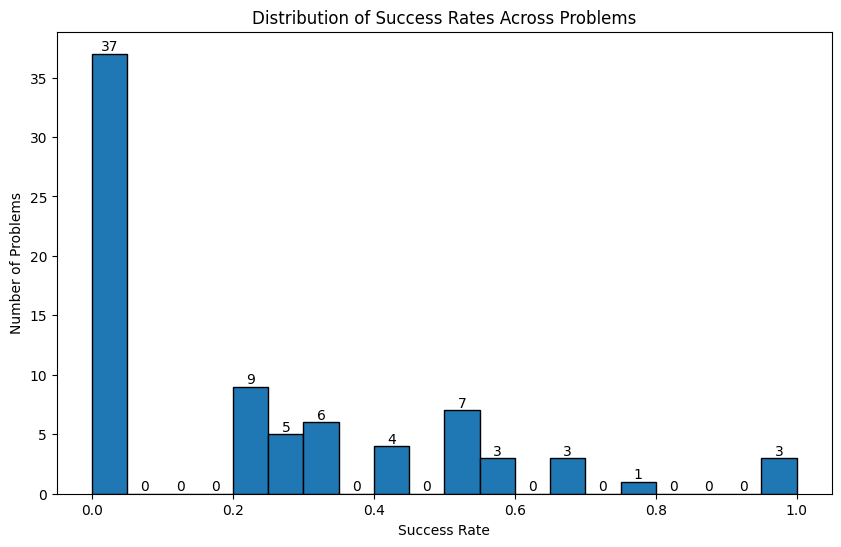

Minimum success rate: 0.00
Maximum success rate: 1.00
Median success rate: 0.20


In [35]:
# Calculate the success rate for each problem
success_rate = df.groupby('row_id')['verification_y'].mean()

# Calculate the overall success rate
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(success_rate, bins=20, edgecolor='black')
plt.title('Distribution of Success Rates Across Problems')
plt.xlabel('Success Rate')
plt.ylabel('Number of Problems')

# Add count on top of each bar, centered
for i, v in enumerate(n):
    plt.text((bins[i] + bins[i+1]) / 2, v, str(int(v)), ha='center', va='bottom')
overall_success_rate = success_rate.mean() * 100

plt.show()

# Print some statistics about the success rates
print(f"Minimum success rate: {success_rate.min():.2f}")
print(f"Maximum success rate: {success_rate.max():.2f}")
print(f"Median success rate: {success_rate.median():.2f}")
